# Week 10-2 RNN을 활용한 감성 분석 - 전처리 후

In [1]:
# 케라스 전처리 - 토근화
from tensorflow.keras.preprocessing.text import Tokenizer
t  = Tokenizer()
fit_text = "The earth is an awesome place live"
t.fit_on_texts([fit_text])
print("word_index : ",t.word_index) # 단어 집합(vocabulary) 출력

word_index :  {'the': 1, 'earth': 2, 'is': 3, 'an': 4, 'awesome': 5, 'place': 6, 'live': 7}


In [2]:
# 텍스트를 숫자로 변환 

temp=t.texts_to_sequences([fit_text])
sequences = t.texts_to_sequences([fit_text])[0]
print("sequences : ",sequences)

sequences :  [1, 2, 3, 4, 5, 6, 7]


In [3]:
# 텍스트를 숫자로 변환 

test_text = "The earth is a great place live"
temp=t.texts_to_sequences([test_text])
sequences = t.texts_to_sequences([test_text])[0]
print("sequences : ",sequences)

sequences :  [1, 2, 3, 6, 7]


In [4]:
# 케라스 전처리 – 패딩

from tensorflow.keras.preprocessing.sequence import pad_sequences
pad_sequences([[1, 2, 3], [3, 4, 5, 6], [7, 8]], maxlen=3, padding='pre')

array([[1, 2, 3],
       [4, 5, 6],
       [0, 7, 8]])

In [5]:
# 단어 임베딩
from tensorflow.keras.layers import Embedding

In [6]:
# 데이터 읽기

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

os.chdir(r'C:\Users\USER\kjw\LG전자_25\Week10')
review_df=pd.read_csv("thinq_e_review_result.csv")

review_df

date  star   like  \
0      September 18, 2021     1   12.0   
1      September 19, 2021     1    NaN   
2      September 18, 2021     2    6.0   
3      September 18, 2021     1    2.0   
4       September 1, 2021     1  104.0   
...                   ...   ...    ...   
11275        June 6, 2019     5    NaN   
11276    November 9, 2020     5    NaN   
11277       July 17, 2020     5    NaN   
11278  September 27, 2020     1    NaN   
11279     January 1, 2021     1    NaN   

                                                 comment  \
0      This app no longer works. It has just updated ...   
1      Everything worked fine until a week or so ago....   
2      App doesn't work with wired TV connection. EDI...   
3      I'm trying this again by have Alexa connection...   
4      Just embarrassing. Absolutely, 100%, will not ...   
...                                                  ...   
11275                            Good app. useful so far   
11276           Its been helpful. Hope it stays that way   
11277  Worked like it should and gave me feedback tha...   
11278                            error routed device.. .   
11279               Not connected with washing machine 😞   

                                               comment_n  
0      ['app', 'longer', 'work', 'updated', 'tell', '...  
1      ['everything', 'worked', 'fine', 'week', 'ago'...  
2      ['app', 'work', 'wired', 'tv', 'connection', '...  
3      ['trying', 'alexa', 'connection', 'turn', 'lg'...  
4      ['embarrassing', 'absolutely', 'connect', 'goo...  
...                                                  ...  
11275                   ['good', 'app', 'useful', 'far']  
11276                 ['helpful', 'hope', 'stay', 'way']  
11277  ['worked', 'like', 'gave', 'feedback', 'wanting']  
11278                      ['error', 'routed', 'device']  
11279                ['connected', 'washing', 'machine']  

[11280 rows x 5 columns]

In [7]:
# 목표 변수 만들기(이전 예제와 동일)
del_index=review_df[review_df['star']==3].index
review_df.drop(del_index,axis=0,inplace=True)
review_df.shape

(10153, 5)

In [8]:
review_df['sentiment']=review_df['star'].apply(lambda x: 1 if x>=4 else 0)
review_df

date  star   like  \
0      September 18, 2021     1   12.0   
1      September 19, 2021     1    NaN   
2      September 18, 2021     2    6.0   
3      September 18, 2021     1    2.0   
4       September 1, 2021     1  104.0   
...                   ...   ...    ...   
11275        June 6, 2019     5    NaN   
11276    November 9, 2020     5    NaN   
11277       July 17, 2020     5    NaN   
11278  September 27, 2020     1    NaN   
11279     January 1, 2021     1    NaN   

                                                 comment  \
0      This app no longer works. It has just updated ...   
1      Everything worked fine until a week or so ago....   
2      App doesn't work with wired TV connection. EDI...   
3      I'm trying this again by have Alexa connection...   
4      Just embarrassing. Absolutely, 100%, will not ...   
...                                                  ...   
11275                            Good app. useful so far   
11276           Its been helpful. Hope it stays that way   
11277  Worked like it should and gave me feedback tha...   
11278                            error routed device.. .   
11279               Not connected with washing machine 😞   

                                               comment_n  sentiment  
0      ['app', 'longer', 'work', 'updated', 'tell', '...          0  
1      ['everything', 'worked', 'fine', 'week', 'ago'...          0  
2      ['app', 'work', 'wired', 'tv', 'connection', '...          0  
3      ['trying', 'alexa', 'connection', 'turn', 'lg'...          0  
4      ['embarrassing', 'absolutely', 'connect', 'goo...          0  
...                                                  ...        ...  
11275                   ['good', 'app', 'useful', 'far']          1  
11276                 ['helpful', 'hope', 'stay', 'way']          1  
11277  ['worked', 'like', 'gave', 'feedback', 'wanting']          1  
11278                      ['error', 'routed', 'device']          0  
11279                ['connected', 'washing', 'machine']          0  

[10153 rows x 6 columns]

<AxesSubplot:>

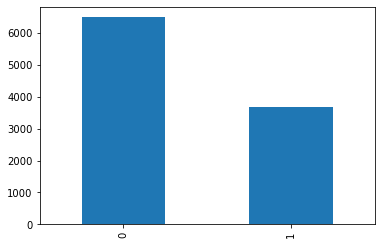

In [9]:
# 목표 변수 분포
review_df['sentiment'].value_counts().plot(kind='bar')

In [10]:
# 입력 변수와 출력 변수 분리
X_data = review_df['comment_n'].apply(lambda x: ' '.join(eval(x)))
y_data = review_df['sentiment']

In [11]:
# 토큰화
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_data)
sequences = tokenizer.texts_to_sequences(X_data)
print(sequences)

[[1, 211, 4, 220, 105, 153, 931, 647, 453, 105, 49, 114, 153, 453, 704, 253, 999, 49, 739, 660, 4, 94, 1752, 13, 1080, 6, 5], [131, 107, 94, 247, 476, 9, 267, 197, 73, 623, 55, 412, 4, 454, 108, 83, 69, 284, 454, 83, 1937, 131, 35, 94, 599, 284, 69, 6, 5], [1, 4, 1637, 3, 95, 169, 73, 1, 3, 220, 694, 2449, 760, 5, 60, 3, 18, 40, 184, 1637, 108, 1, 107, 94, 1637, 95, 1, 624, 375, 6, 5], [127, 135, 95, 33, 2, 3, 547, 3, 2, 269, 4, 1000, 48, 105, 789, 266, 48, 266, 859, 9, 135, 9, 2, 859, 455, 695, 3909, 6, 5], [2450, 271, 9, 29, 27, 552, 1, 970, 3, 29, 27, 203, 145, 29, 61, 2, 905, 29, 14, 971, 145, 61, 250, 198, 6, 5], [696, 212, 35, 337, 187, 35, 48, 125, 4, 94, 306, 9, 2, 25, 3, 376, 83, 717, 1372, 1, 258, 80, 66, 2, 99, 1, 43, 7, 1, 6, 5], [599, 5, 103, 1081, 1753, 42, 1, 313, 4, 63, 37, 134, 1, 65, 229, 10, 9, 3, 10, 148, 1438, 258, 253, 494, 355, 578, 6, 5], [2960, 1, 2, 267, 1522, 1, 1242, 15, 52, 42, 1082, 278, 267, 7, 7, 267, 2961, 71, 1523, 972, 82, 2, 625, 2962, 3910, 357, 42,

In [12]:
# 단어-to-인덱스 확인하기
word_to_index = tokenizer.word_index
print(word_to_index)

{'app': 1, 'lg': 2, 'tv': 3, 'work': 4, 'review': 5, 'full': 6, 'use': 7, 'phone': 8, 'connect': 9, 'time': 10, 'washer': 11, 'need': 12, 'update': 13, 'device': 14, 'remote': 15, 'control': 16, 'even': 17, 'wifi': 18, 'dryer': 19, 'machine': 20, 'get': 21, 'great': 22, 'good': 23, 'permission': 24, 'smart': 25, 'location': 26, 'home': 27, 'like': 28, 'google': 29, 'cycle': 30, 'make': 31, 'call': 32, 'turn': 33, 'washing': 34, 'working': 35, 'appliance': 36, 'would': 37, 'product': 38, 'new': 39, 'access': 40, 'want': 41, 'feature': 42, 'able': 43, 'easy': 44, 'ac': 45, 'notification': 46, 'option': 47, 'one': 48, 'account': 49, 'using': 50, 'useless': 51, 'start': 52, 'know': 53, 'love': 54, 'say': 55, 'issue': 56, 'also': 57, 'keep': 58, 'add': 59, 'connected': 60, 'problem': 61, 'please': 62, 'well': 63, 'still': 64, 'really': 65, 'give': 66, 'set': 67, 'useful': 68, 'setting': 69, 'without': 70, 'see': 71, 'much': 72, 'tried': 73, 'rooted': 74, 'fridge': 75, 'run': 76, 'thinq': 77

In [13]:
# 단어 빈도수 확인
tokenizer.word_counts.items()

odict_items([('app', 7053), ('longer', 122), ('work', 1879), ('updated', 116), ('tell', 253), ('login', 175), ('incorrect', 19), ('three', 33), ('attempt', 53), ('account', 458), ('many', 241), ('sends', 29), ('email', 101), ('verify', 17), ('logging', 27), ('website', 32), ('fine', 288), ('released', 6), ('update', 947), ('yesterday', 15), ('full', 1573), ('review', 1609), ('everything', 210), ('worked', 249), ('week', 103), ('ago', 51), ('connect', 1388), ('oven', 93), ('anymore', 135), ('tried', 337), ('starting', 35), ('say', 425), ('may', 59), ('ghz', 53), ('network', 248), ('try', 307), ('setting', 346), ('router', 86), ('um', 5), ('working', 571), ('changed', 37), ('wired', 7), ('tv', 2713), ('connection', 282), ('edit', 154), ('firmware', 30), ('posted', 3), ('original', 26), ('connected', 393), ('wifi', 807), ('access', 528), ('point', 142), ('appears', 35), ('provide', 66), ('trying', 216), ('alexa', 204), ('turn', 576), ('lg', 2852), ('webos', 43), ('amazon', 92), ('together

In [14]:
# 한 번 출현한 단어 비율 확인하기
threshold = 2
total_cnt = len(word_to_index) # 단어의 수
rare_cnt = 0
total_freq = 0
rare_freq = 0

for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합(vocabulary)에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)


등장 빈도가 1번 이하인 희귀 단어의 수: 3812
단어 집합(vocabulary)에서 희귀 단어의 비율: 49.37823834196891
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 2.695650329177657


In [15]:
# 단어 사이즈 확인
vocab_size = len(word_to_index) + 1  # 패딩을 위한 토큰인 0번 고려
print('단어 집합의 크기: {}'.format((vocab_size)))

단어 집합의 크기: 7721


텍스트의 최대 길이 : 46
텍스트의 최소 길이 : 1
텍스트의 평균 길이 : 13.928199


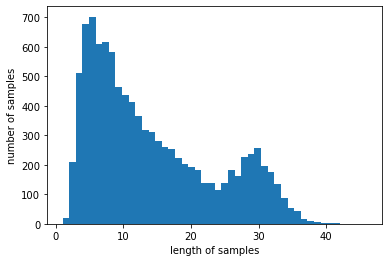

In [17]:
# 텍스트 길이 분포 보기
X_data = sequences
print('텍스트의 최대 길이 : %d' % max(len(l) for l in X_data))
print('텍스트의 최소 길이 : %d' % min(len(l) for l in X_data))
print('텍스트의 평균 길이 : %f' % (sum(map(len, X_data))/len(X_data)))
plt.hist([len(s) for s in X_data], bins=46)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [18]:
# 패딩과 훈련 데이터, 테스트 데이터 나누기
max_len = 46
data = pad_sequences(X_data, maxlen = max_len)
print("훈련 데이터의 크기(shape): ", data.shape)

# 훈련 데이터와 테스트 데이터 분리

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, y_data, test_size=0.3, random_state=156)
print('train data set size = {0},  test data set size = {1}'.format(x_train.shape[0],x_test.shape[0]))
x_train[0]

훈련 데이터의 크기(shape):  (10153, 46)
train data set size = 7107,  test data set size = 3046


array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0, 1218,
       1181,   69,  100, 1646,   69,   15,  130,  868,    7,  692,   18,
       3844, 6876])

In [19]:
# SimpleRNN 모델 만들기
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Embedding(vocab_size, 32)) 
model.add(SimpleRNN(32)) 
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train, epochs=4, batch_size=64, validation_split=0.2)

Epoch 1/4
89/89 [==============================] - 2s 8ms/step - loss: 0.5613 - acc: 0.7157 - val_loss: 0.4027 - val_acc: 0.8558
Epoch 2/4
89/89 [==============================] - 0s 5ms/step - loss: 0.3312 - acc: 0.8691 - val_loss: 0.3139 - val_acc: 0.8854
Epoch 3/4
89/89 [==============================] - 1s 6ms/step - loss: 0.2502 - acc: 0.9082 - val_loss: 0.3154 - val_acc: 0.8678
Epoch 4/4
89/89 [==============================] - 0s 6ms/step - loss: 0.2026 - acc: 0.9291 - val_loss: 0.3170 - val_acc: 0.8650


In [20]:
model.evaluate(x_test, y_test)

96/96 [==============================] - 0s 1ms/step - loss: 0.3673 - acc: 0.8431


[0.3672650158405304, 0.8430728912353516]

96/96 [==============================] - 0s 1ms/step - loss: 0.3673 - acc: 0.8431

 테스트 정확도: 0.8431


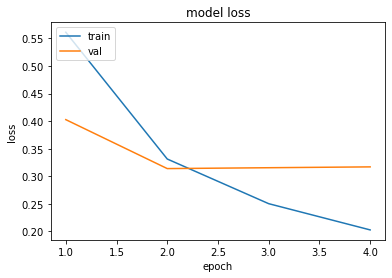

In [21]:
# 성능 평가
# 정확도 확인
print("\n 테스트 정확도: %.4f" % (model.evaluate(x_test, y_test)[1]))

# Loss 시각화
epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

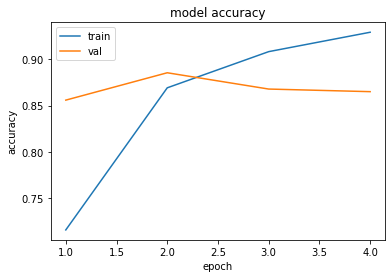

In [22]:
# 정확도 시각화 
plt.plot(epochs, history.history['acc'])
plt.plot(epochs, history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [23]:
# LSTM 모델 만들기
from tensorflow.keras.layers import LSTM, Embedding, Dense
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Embedding(vocab_size, 32)) 
model.add(LSTM(32)) 
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train, epochs=8, batch_size=64, validation_split=0.2)

Epoch 1/8
89/89 [==============================] - 3s 13ms/step - loss: 0.5302 - acc: 0.7515 - val_loss: 0.4143 - val_acc: 0.8579
Epoch 2/8
89/89 [==============================] - 1s 10ms/step - loss: 0.3292 - acc: 0.8843 - val_loss: 0.2967 - val_acc: 0.8896
Epoch 3/8
89/89 [==============================] - 1s 10ms/step - loss: 0.2469 - acc: 0.9103 - val_loss: 0.2748 - val_acc: 0.8945
Epoch 4/8
89/89 [==============================] - 1s 10ms/step - loss: 0.2088 - acc: 0.9242 - val_loss: 0.2655 - val_acc: 0.8945
Epoch 5/8
89/89 [==============================] - 1s 13ms/step - loss: 0.1794 - acc: 0.9358 - val_loss: 0.2720 - val_acc: 0.9001
Epoch 6/8
89/89 [==============================] - 1s 12ms/step - loss: 0.1568 - acc: 0.9453 - val_loss: 0.2982 - val_acc: 0.8833
Epoch 7/8
89/89 [==============================] - 1s 10ms/step - loss: 0.1413 - acc: 0.9493 - val_loss: 0.2939 - val_acc: 0.8973
Epoch 8/8
89/89 [==============================] - 1s 10ms/step - loss: 0.1249 - acc: 0.95

96/96 [==============================] - 0s 2ms/step - loss: 0.3815 - acc: 0.8716

 테스트 정확도: 0.8716


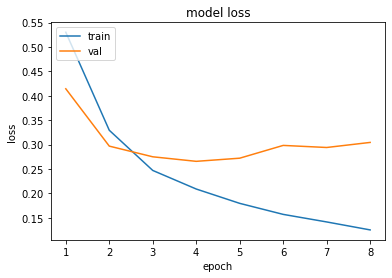

In [24]:
# 성능 평가
# 정확도 확인
print("\n 테스트 정확도: %.4f" % (model.evaluate(x_test, y_test)[1]))

# Loss 시각화
epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

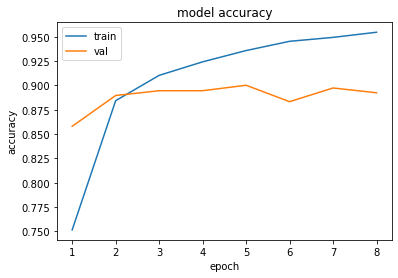

In [25]:
# 정확도 시각화 
plt.plot(epochs, history.history['acc'])
plt.plot(epochs, history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()